# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 

In [ ]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
# dataframes creation
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

In [5]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
avocado_df = avocado_df.sort_values('Date')

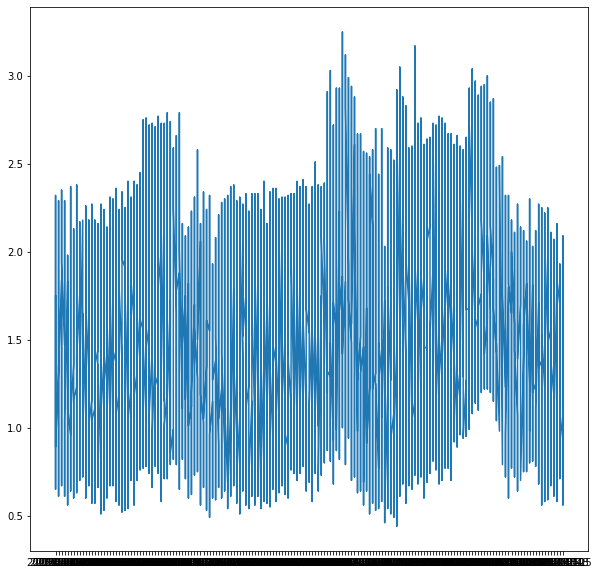

In [10]:
# Plot date and average price
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

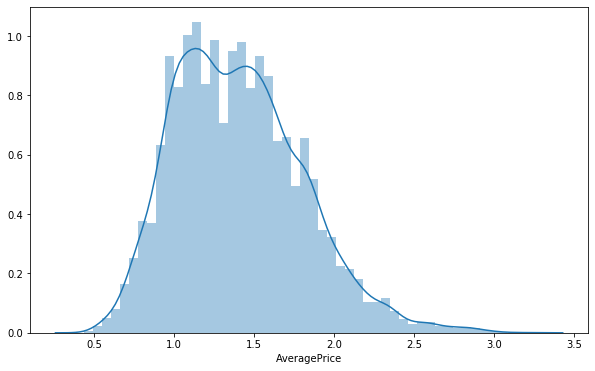

In [12]:
# Distribution of the average price
plt.figure(figsize = (10,6))
sns.distplot(avocado_df['AveragePrice'])

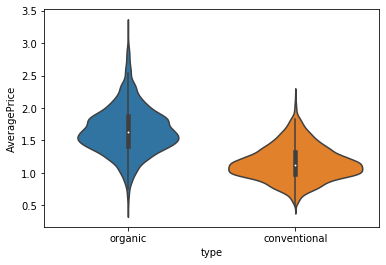

In [14]:
# Violin plot of the average price vs. avocado type
sns.violinplot(y = 'AveragePrice', x = 'type',data = avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

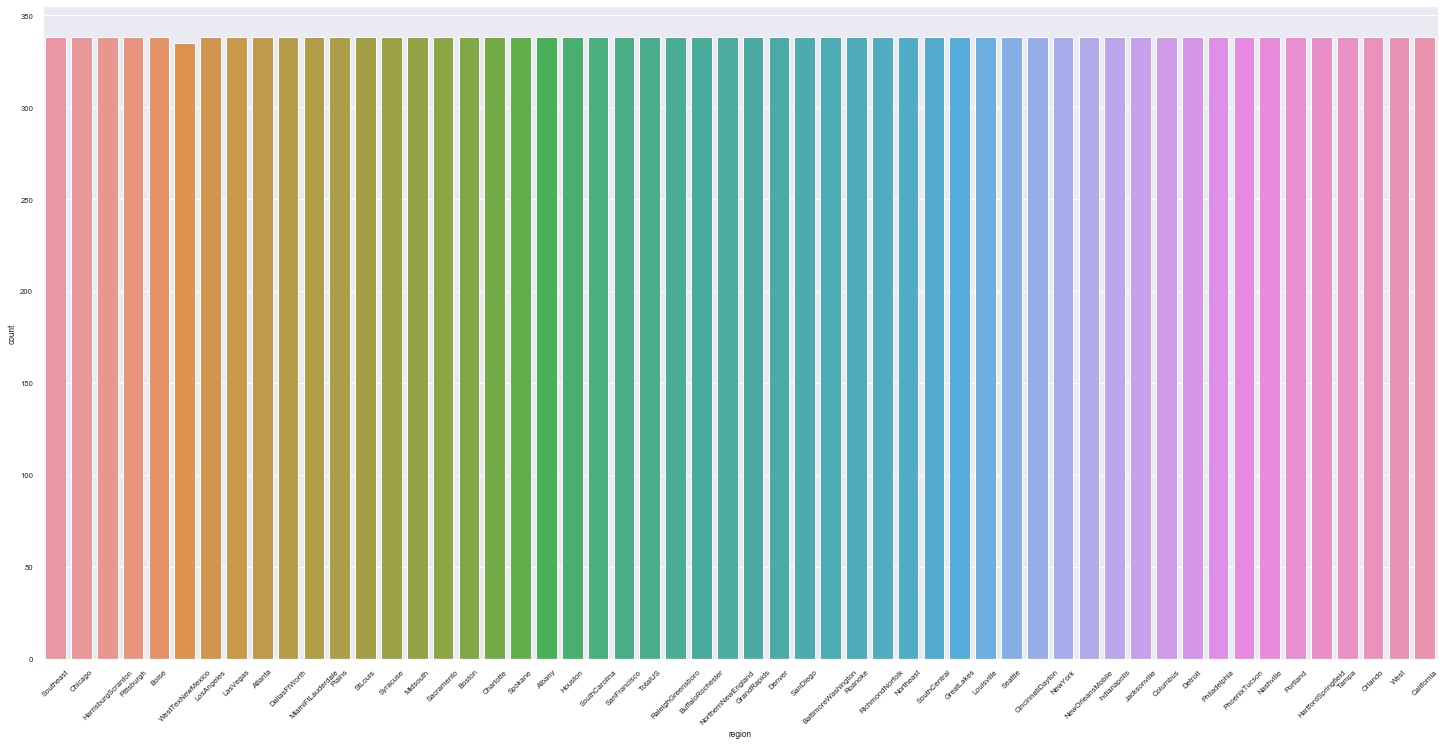

In [15]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

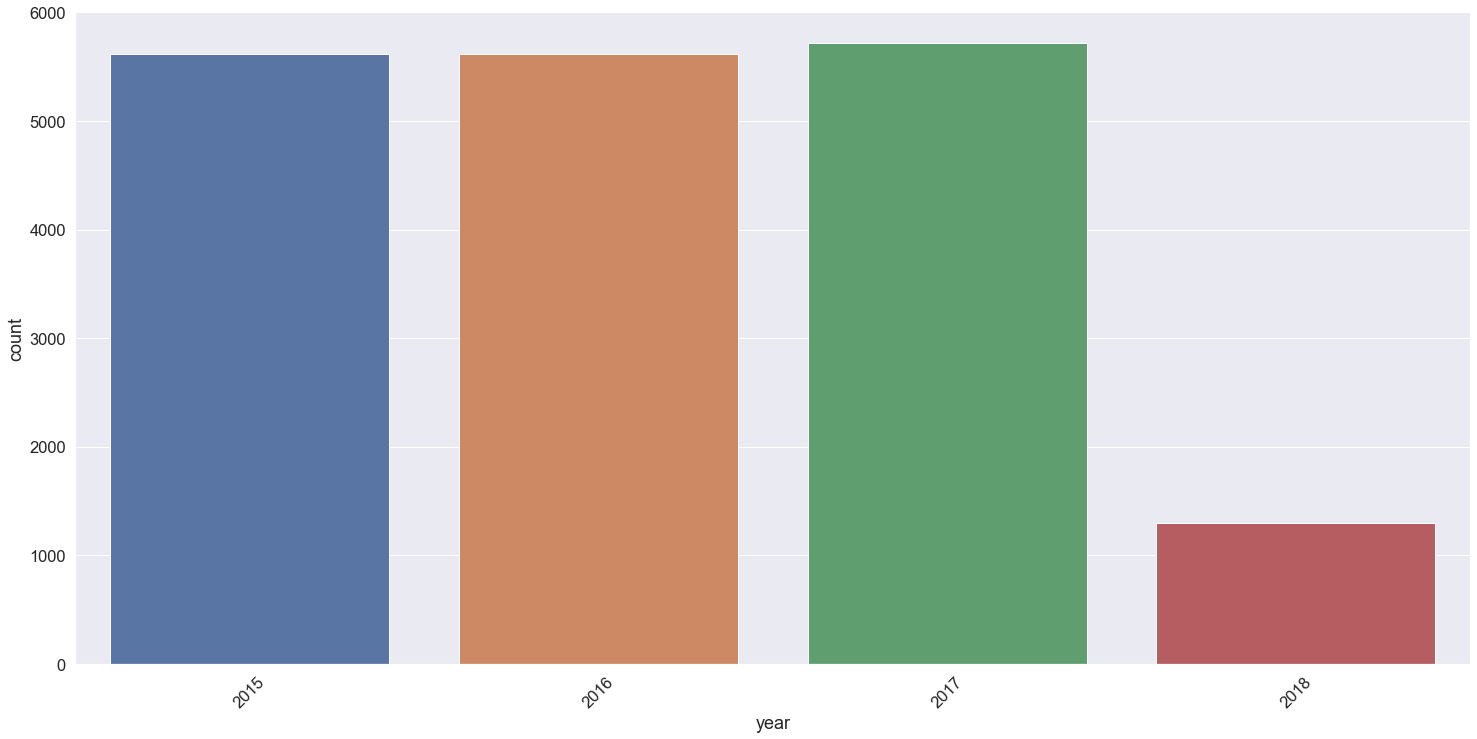

In [17]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

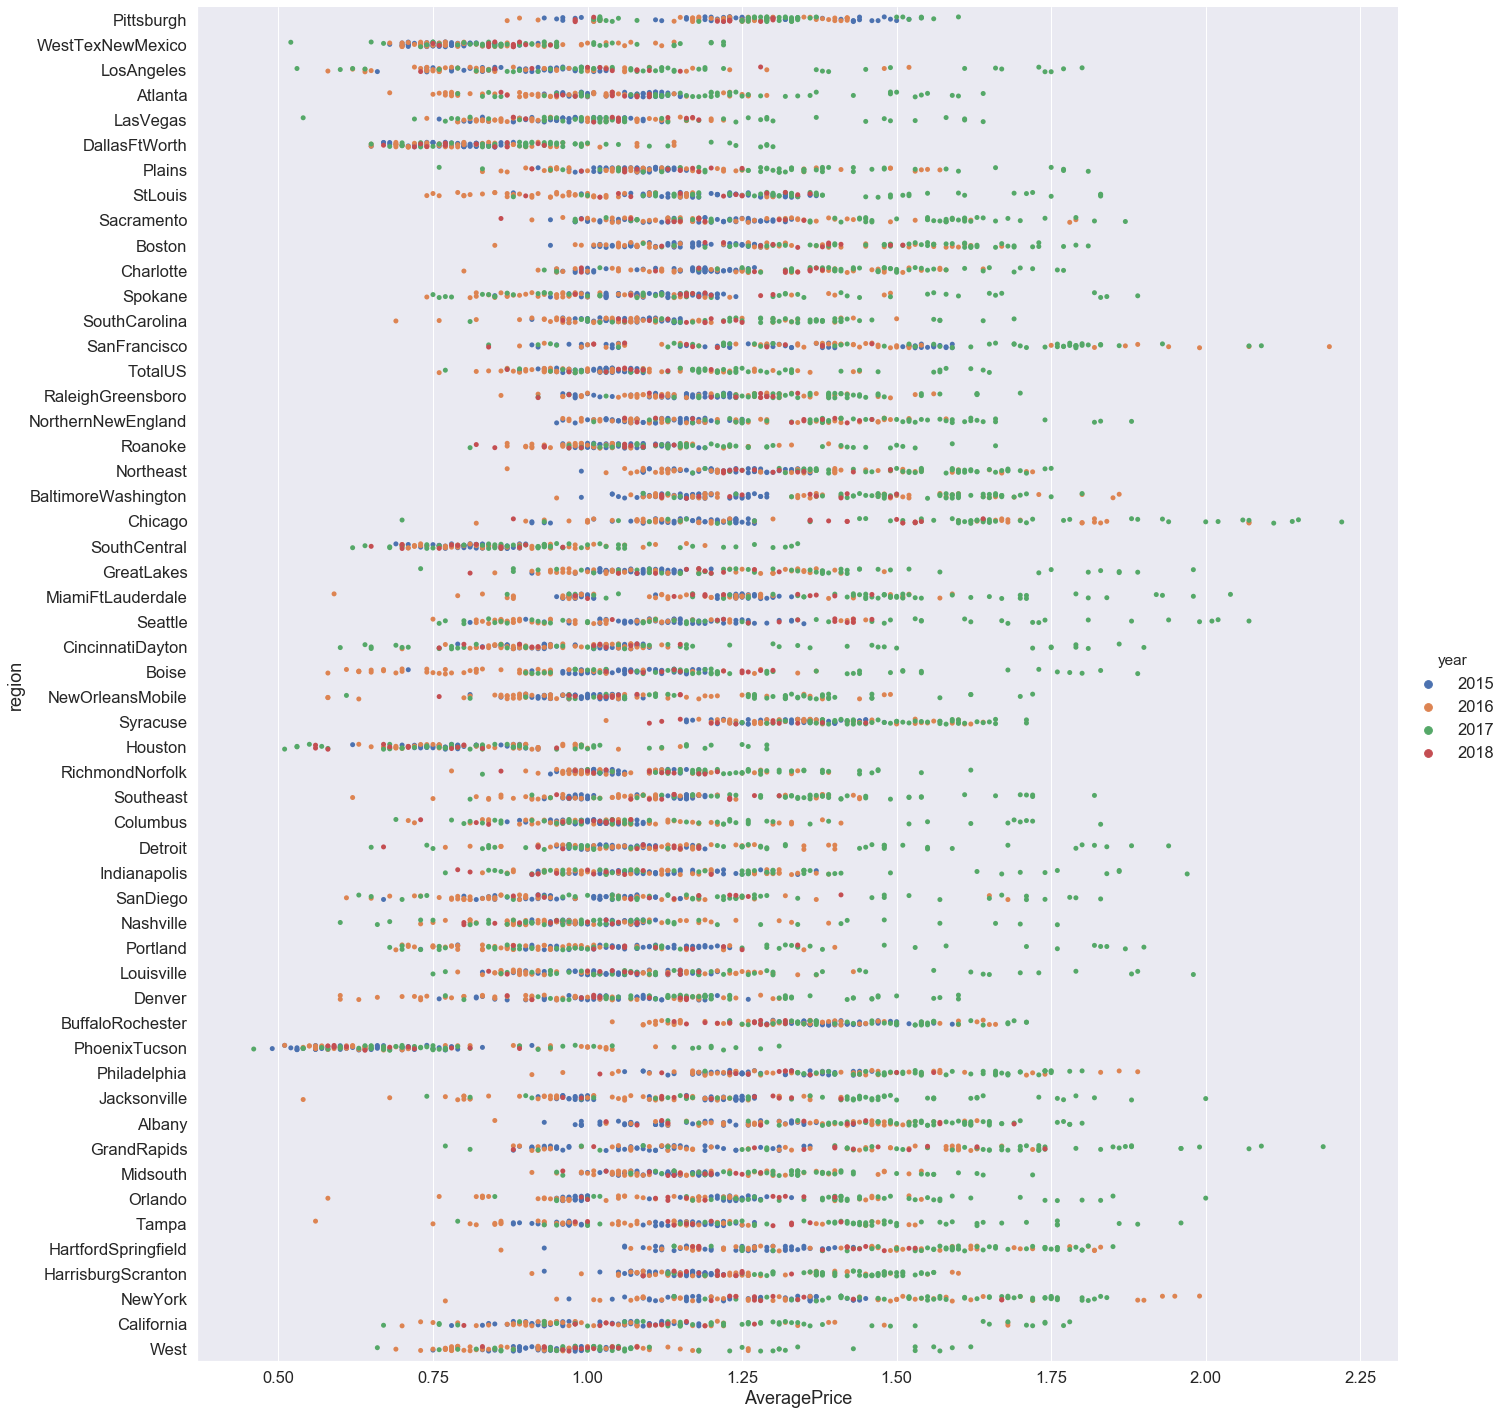

In [19]:
 # Avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type']=='conventional'], hue = 'year',height = 20)

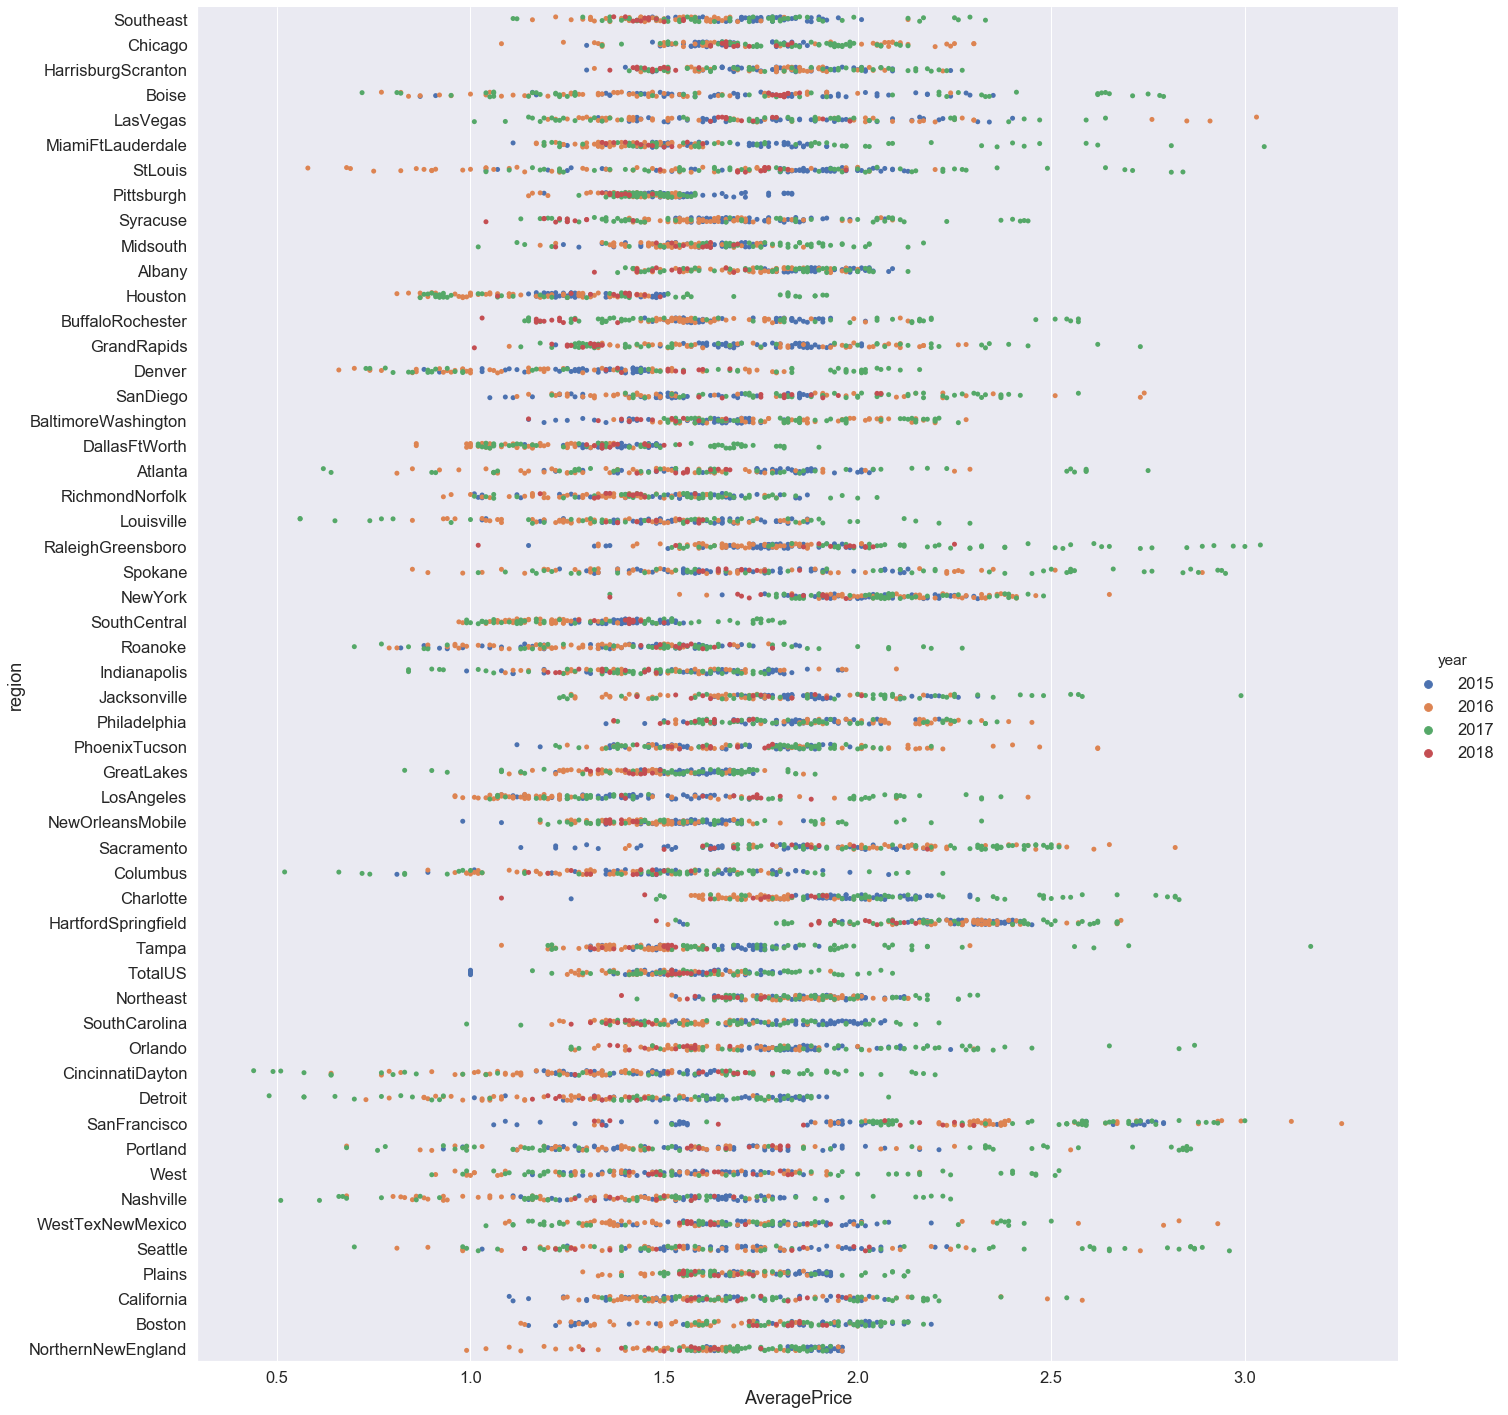

In [20]:
  # Avocado prices vs. regions for organic avocados
organic = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type']=='organic'], hue = 'year',height = 20)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [21]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [22]:
avocado_prophet_df = avocado_df[['Date','AveragePrice']]
avocado_prophet_df.head()

In [24]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date' : 'ds', 'AveragePrice' : 'y'})
avocado_prophet_df.head()

In [27]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.889739,1.844536,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.913422,1.857099,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.896267,1.821764,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.913239,1.865567,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.892065,1.899935,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161737,0.522675,1.629610,0.991870,1.343720,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,-0.086289,0.0,0.0,0.0,1.075448
18610,2019-03-22,1.161007,0.548657,1.587600,0.990073,1.343690,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,-0.084622,0.0,0.0,0.0,1.076384
18611,2019-03-23,1.160276,0.554622,1.572193,0.988418,1.343558,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,-0.082682,0.0,0.0,0.0,1.077594
18612,2019-03-24,1.159545,0.567917,1.626756,0.986391,1.343475,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,-0.080489,0.0,0.0,0.0,1.079056


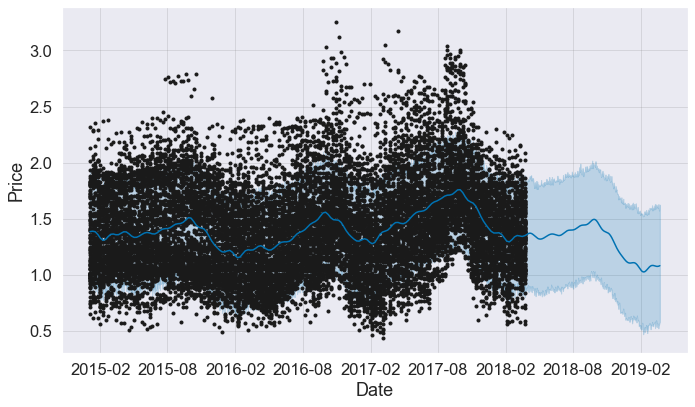

In [30]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

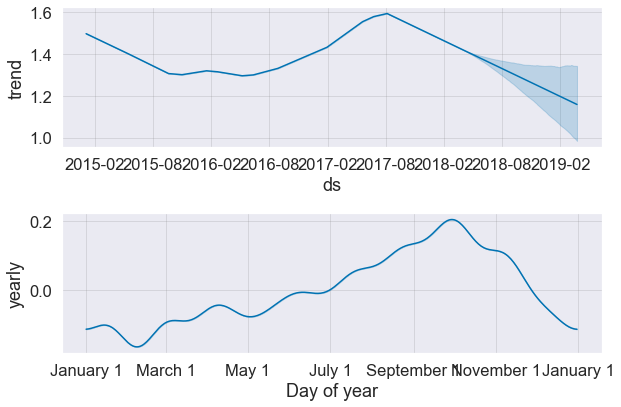

In [31]:
figure2 = m.plot_components(forecast)

In [33]:
# Specific region
avocado_df_sample = avocado_df[avocado_df['region']=='West']
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


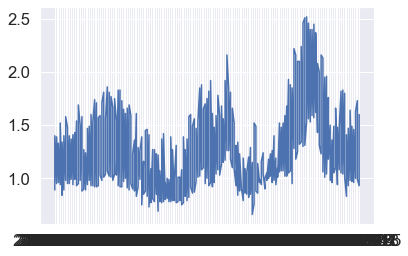

In [35]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [36]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [37]:
m = Prophet()
m.fit(avocado_df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


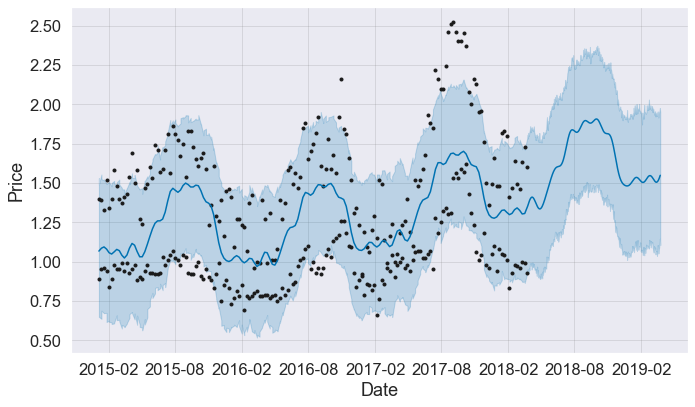

In [38]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

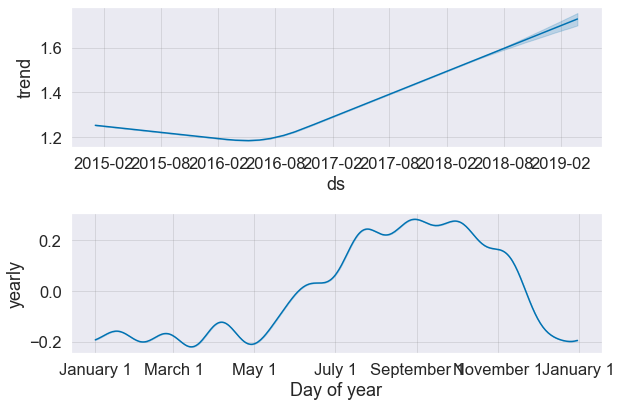

In [39]:
figure3 = m.plot_components(forecast)